In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/SantiagoJulioD/LabAv2/refs/heads/main/La2O3junio3.csv',names=['2Theta','I'])
bg = pd.read_csv('https://raw.githubusercontent.com/SantiagoJulioD/LabAv2/refs/heads/main/background.csv',names=['2Theta','I'])

In [15]:
func = lambda x,a,b,c: a*np.exp(-b*x)+c

pars,_ = curve_fit(func,bg['2Theta'],bg['I'])

noise = lambda x: func(x,*pars)

bg_fit = pd.DataFrame()
bg_fit['2Theta'] = raw_data['2Theta']
bg_fit['I'] = noise(bg_fit['2Theta'])


/home/santiago/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


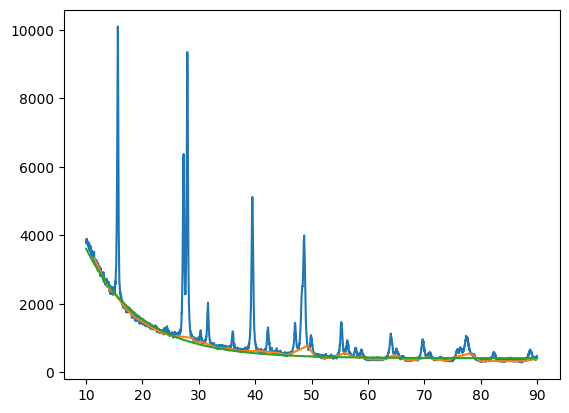

In [19]:
plt.plot(raw_data['2Theta'],raw_data['I'])
plt.plot(bg['2Theta'],bg['I'])
plt.plot(bg_fit['2Theta'],bg_fit['I'])

In [23]:
filtered_data = pd.DataFrame()
filtered_data['2Theta'] = raw_data['2Theta']
filtered_data['I'] = raw_data['I']-bg_fit['I']
filtered_data['I'] = filtered_data['I']/np.max(filtered_data['I'])

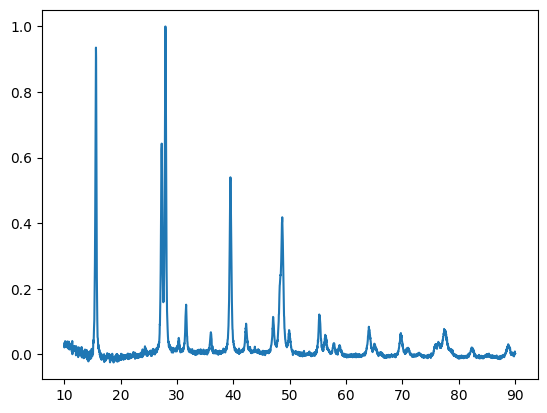

In [24]:
plt.plot(filtered_data['2Theta'],filtered_data['I'])